# Import Basic Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV

# Load the Dataset

In [5]:
data = pd.read_csv(r"C:\Users\Prakriti\Downloads\Hotel_Reviews.csv")

# Exploring our Dataset

In [7]:
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [8]:
data.tail()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
9995,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Accommodation & Food Services,Rockaway Beach,US,us/or/rockawaybeach/215spacificst/-1035432852,45.61126,...,2016-03-23T00:00:00Z,3.0,http://www.tripadvisor.com/Hotel_Review-g52043...,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,Wildwood,GA,LASH0211,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,669 Route 6a,"Hotel,Hotels",Accommodation & Food Services,East Sandwich,US,us/ma/eastsandwich/669route6a/-1480952475,41.72939,...,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",4.0,https://www.tripadvisor.com/Hotel_Review-g4154...,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",East Sandwich,MA,Gennaker,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Accommodation & Food Services,Coeur d'Alene,US,us/id/coeurd'alene/702wapplewayave/210547670,47.69993,...,2017-12-17T00:00:00Z,4.0,https://www.tripadvisor.com/Hotel_Review-g3541...,Rolled in 11:30 laid out heads down woke up to...,Passing through,Montana,UnitedStates,Amber406,https://www.tripadvisor.com/Hotel_Review-g3541...,http://www.shiloinns.com
9998,AVwdHbizIN2L1WUfsXto,2016-12-13T03:44:36Z,2018-01-01T00:00:43Z,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Accommodation & Food Services,Jackson,US,us/tn/jackson/2295nhighlandave/1759289930,35.66639,...,2016-07-16T00:00:00Z,1.0,https://www.tripadvisor.com/Hotel_Review-g5512...,Absolutely terrible..I was told I was being gi...,Terrible,woodbury,NaN,donWoodbury,https://www.tripadvisor.com/Hotel_Review-g5512...,http://api.citygridmedia.com/content/places/v2...
9999,AVwddMfdIN2L1WUfwAue,2016-06-22T19:07:21Z,2018-01-01T00:00:43Z,3811 Minnesota Dr,"Hotel,Motels,Lodging,Hotels,Hotels and Motels",Accommodation & Food Services,Anchorage,US,us/ak/anchorage/3811minnesotadr/806029870,61.18531,...,2017-12-17T00:00:00Z,1.0,https://www.tripadvisor.com/Hotel_Review-g6088...,"Filthy, outdated, noisy neighbours, but this w...",Polde,Sempeter pri Gorici,Slovenia,janezr2013,https://www.tripadvisor.com/Hotel_Review-g6088...,http://royalsuitealaska.com


In [9]:
data.sample(5)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
2274,AVwdMsswkufWRAb53Vy0,2017-04-10T07:43:42Z,2018-06-29T19:35:18Z,3730 Las Vegas Blvd S,"Hotels,Casinos,Resorts,Resort,Casino,Hotel",Accommodation & Food Services,Las Vegas,US,us/nv/lasvegas/3730lasvegasblvds/-1699935985,36.107741,...,"2016-07-27T00:00:00Z,2016-07-12T00:00:00Z",5.0,https://www.tripadvisor.com/Hotel_Review-g4596...,I was skeptical about this hotel after experie...,A very nice hotel,NaN,NaN,mchour1,https://www.tripadvisor.com/Hotel_Review-g4596...,http://www.arialasvegas.com
5700,AVweG6e1_7pvs4fzAG7n,2016-06-04T22:46:03Z,2018-03-20T15:35:51Z,8500 Annapolis Rd,"Hotels,Hotel",Accommodation & Food Services,Hyattsville,US,us/md/hyattsville/8500annapolisrd/1594038909,38.957893,...,2018-03-08T00:00:00Z,4.0,http://www.expedia.com/Hotels.h1114-p185.Hotel...,I was very surprised by how modern the hotel w...,Pleasantly Surprised!,NaN,NaN,A verified traveler,http://www.expedia.com/Hotels.h1114-p401.Hotel...,http://www.metropointshotel.com
3914,AVwcwKAGByjofQCxhy9u,2016-10-18T03:36:56Z,2018-05-01T08:14:54Z,400 N State Route 89A,"Hotels and motels,Resorts,Budget Hotels,Travel...",Accommodation & Food Services,Sedona,US,us/az/sedona/400nstateroute89a/795313142,34.872130,...,2016-03-28T00:00:00Z,5.0,http://www.tripadvisor.com/Hotel_Review-g31352...,We travel to Sedona for one week every year an...,Perfection ... and a Great Deal Too,Scottsdale,NaN,BZ_NZ,https://www.yellowpages.com/sedona-az/mip/best...,https://www.bestwestern.com/en_US/book/hotel-d...
4659,AVweDZahByjofQCxu3Oh,2016-03-22T04:09:20Z,2018-04-14T15:47:48Z,780 Mission St,"Hotels,Hotel",Accommodation & Food Services,San Francisco,US,us/ca/sanfrancisco/780missionst/1009922226,37.785060,...,"2016-11-15T00:00:00Z,2016-10-17T00:00:00Z",5.0,https://www.hotels.com/hotel/120243/reviews%20/,Wonderful stay--- really enjoyed it.,San Francisco In Style,NaN,NaN,A Traveler,http://www.hotels.com/ho120243/%253Flocale%253...,http://www.marriott.com/hotels/travel/sfodt-sa...
99,AV-TGsFqRxPSIh2RmVF-,2017-11-06T20:51:12Z,2018-09-04T21:27:52Z,107 Merrimac Street,"Hotels,Hotel",Accommodation & Food Services,Boston,US,us/ma/boston/107merrimacstreet/93930424,42.363911,...,2018-04-14T00:00:00Z,4.6,https://www.booking.com/reviews/us/hotel/bulfi...,Bad: Timing seemed to be off. Had to wait a ve...,Great location to attend a hockey game!,NaN,NaN,Lori,https://www.telegraph.co.uk/travel/destination...,http://theboxerboston.com/


In [10]:
data.shape

(10000, 25)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

In [12]:
data.describe()

,latitude,longitude,reviews.rating
count,10000.000000,10000.000000,10000.000000
mean,37.003630,-92.675934,4.034265
std,5.517273,19.347989,1.162240
min,19.438604,-159.474930,1.000000
25%,33.927588,-111.622343,3.350000
50%,37.785060,-84.452114,4.000000
75%,40.416380,-77.052700,5.000000
max,70.133620,-68.203990,5.000000


In [13]:
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              1
reviews.userCity        5836
reviews.userProvince    7295
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64

# dropping unnecessary rows

In [15]:
# Drop the columns 'reviews.userCity' and 'reviews.userProvince'
data = data.drop(columns=['reviews.userCity', 'reviews.userProvince'])

In [16]:
data

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,province,reviews.date,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,CA,2015-01-02T00:00:00Z,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,MD,2016-05-15T00:00:00Z,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,MD,2016-07-09T00:00:00Z,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Accommodation & Food Services,Rockaway Beach,US,us/or/rockawaybeach/215spacificst/-1035432852,45.611260,...,OR,2016-03-13T00:00:00Z,2016-03-23T00:00:00Z,3.0,http://www.tripadvisor.com/Hotel_Review-g52043...,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,LASH0211,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,669 Route 6a,"Hotel,Hotels",Accommodation & Food Services,East Sandwich,US,us/ma/eastsandwich/669route6a/-1480952475,41.729390,...,MA,2015-12-11T00:00:00Z,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",4.0,https://www.tripadvisor.com/Hotel_Review-g4154...,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",Gennaker,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,AVwd1TbkByjofQCxs6FH,2016-06-11T03:1

In [17]:
data.shape

(10000, 23)

# Rating Distribution

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_11052\2376232571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=data, palette='viridis')


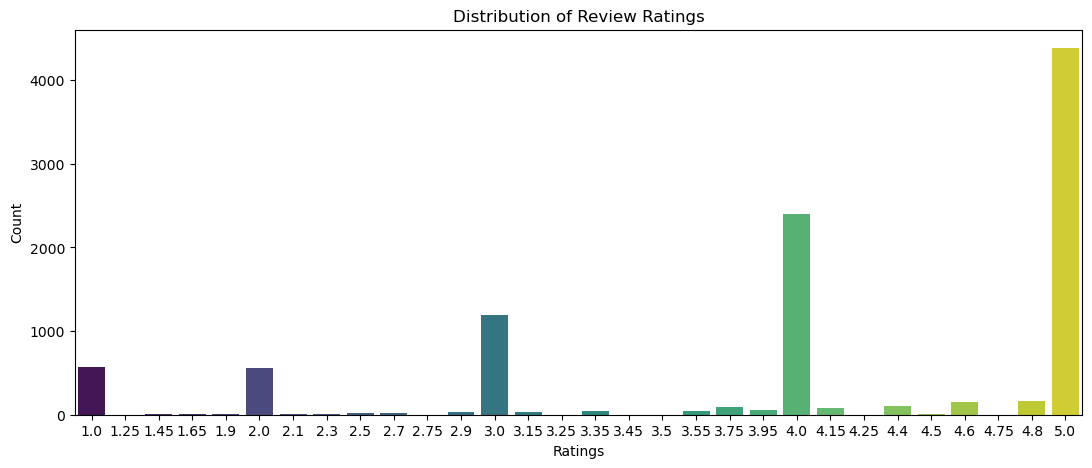

In [40]:
plt.figure(figsize=(13, 5))
sns.countplot(x='reviews.rating', data=data, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# Top review countries

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_11052\4042304860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


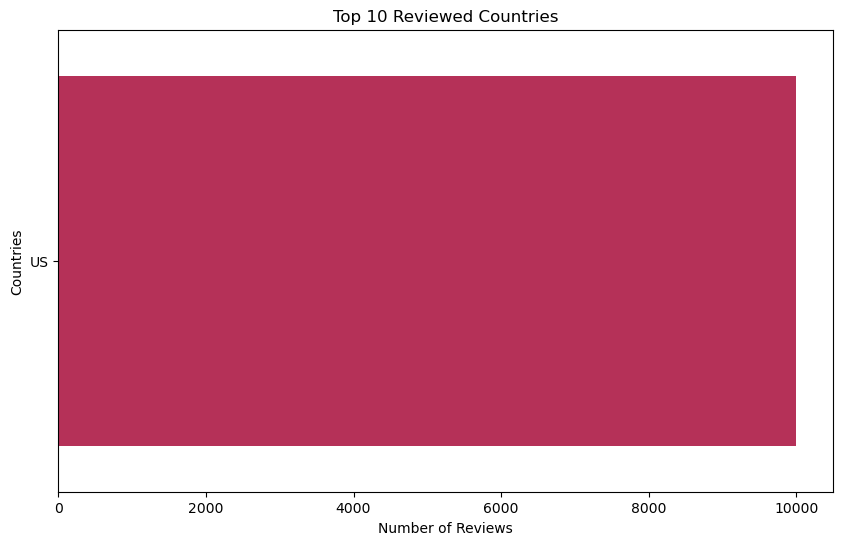

In [22]:
plt.figure(figsize=(10, 6))
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('Top 10 Reviewed Countries')
plt.xlabel('Number of Reviews')
plt.ylabel('Countries')
plt.show()

# Top 10 reviewed cities

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_3448\1824203721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='mako')


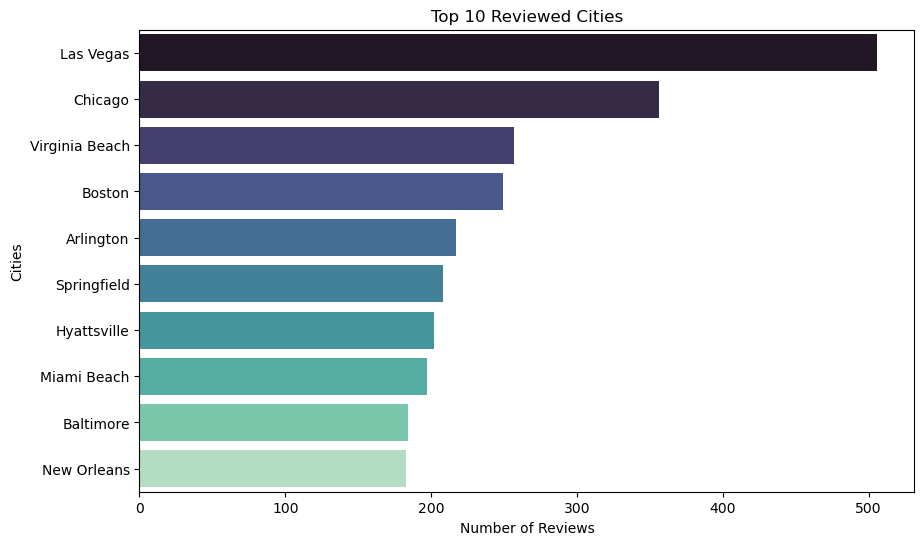

In [22]:
plt.figure(figsize=(10, 6))
top_cities = data['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='mako')
plt.title('Top 10 Reviewed Cities')
plt.xlabel('Number of Reviews')
plt.ylabel('Cities')
plt.show()

# Average Ratings by Category

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_3448\954456336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='coolwarm')


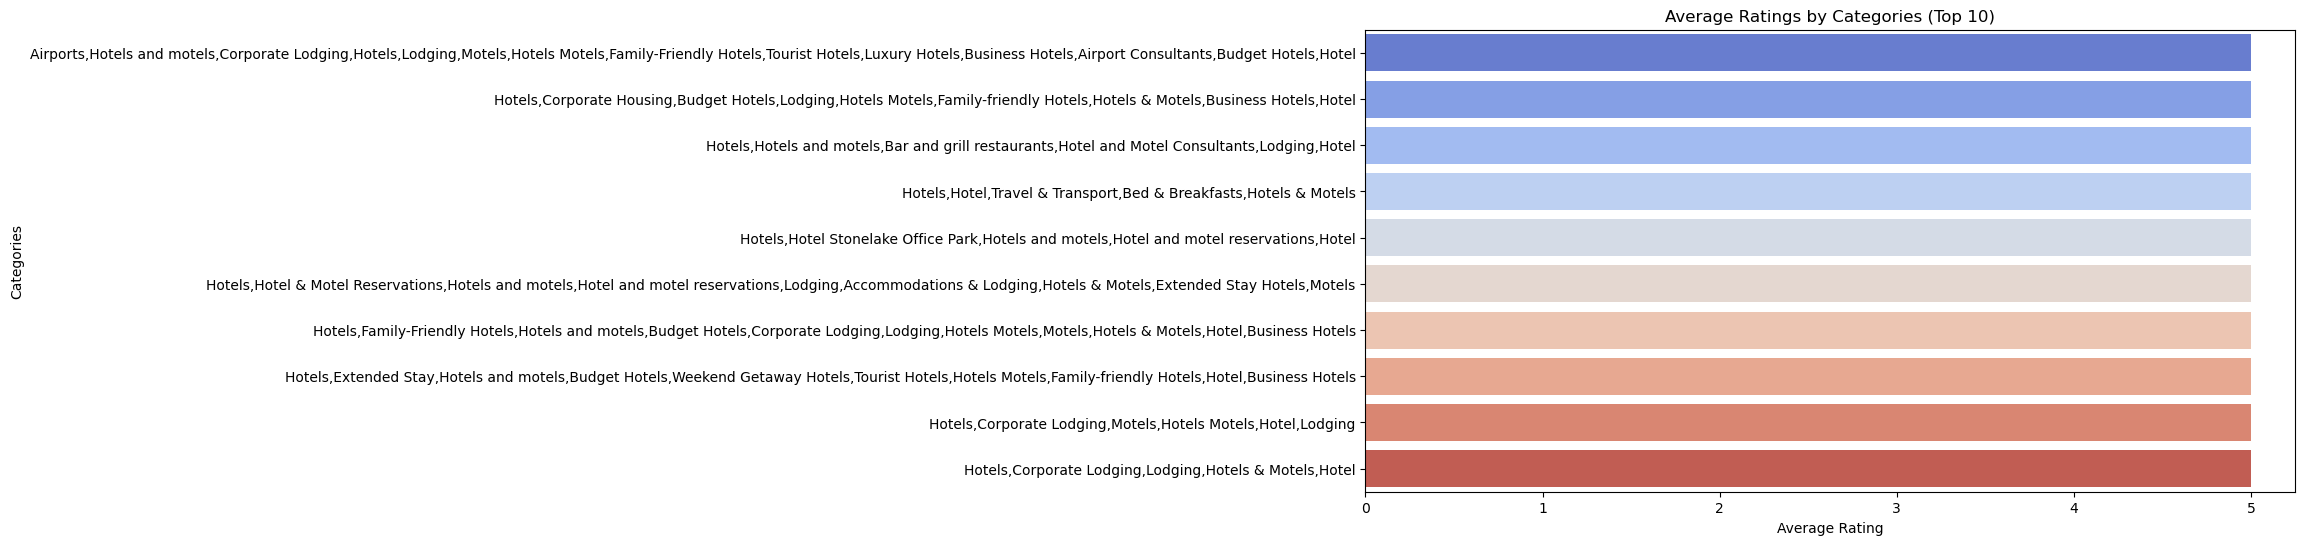

In [24]:
plt.figure(figsize=(12, 6))
avg_ratings = data.groupby('categories')['reviews.rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='coolwarm')
plt.title('Average Ratings by Categories (Top 10)')
plt.xlabel('Average Rating')
plt.ylabel('Categories')
plt.show()


# Review Trends Over Time

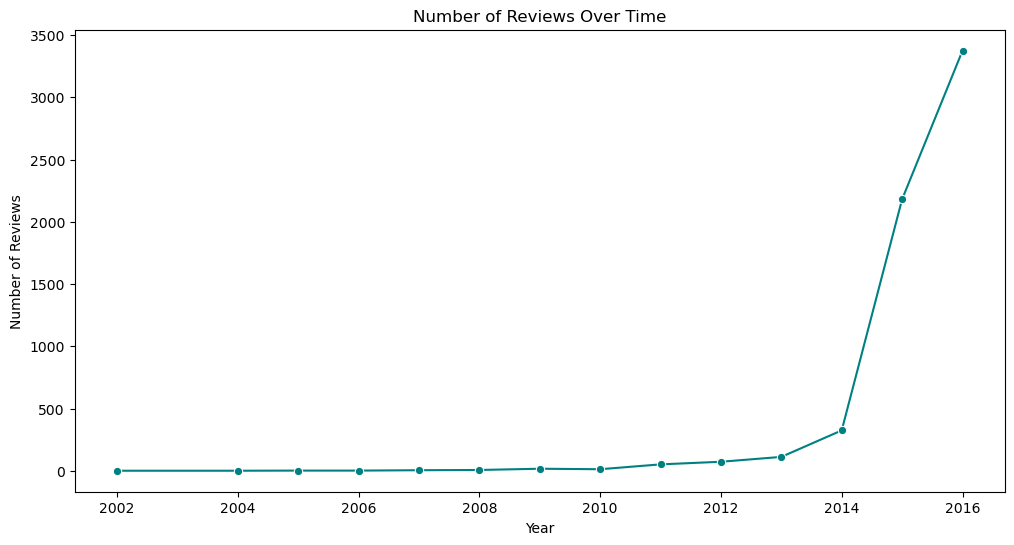

In [26]:
plt.figure(figsize=(12, 6))
data['reviews.date'] = pd.to_datetime(data['reviews.date'], errors='coerce')
data['year'] = data['reviews.date'].dt.year
yearly_reviews = data.groupby('year').size()
sns.lineplot(x=yearly_reviews.index, y=yearly_reviews.values, marker='o', color='teal')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


# User-Generated Reviews (With vs. Without Text)

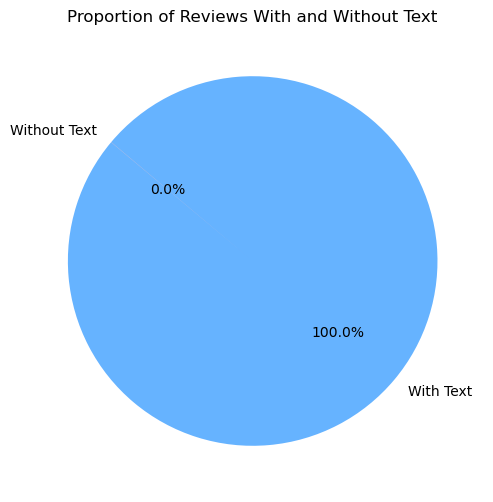

In [28]:
plt.figure(figsize=(6, 6))
missing_text = data['reviews.text'].isnull().sum()
non_missing_text = len(data) - missing_text
labels = ['With Text', 'Without Text']
sizes = [non_missing_text, missing_text]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Reviews With and Without Text')
plt.show()

# Geographical Heatmap

In [30]:
!pip install folium

In [31]:
try:
    import folium
    from folium.plugins import HeatMap

    map_data = data.dropna(subset=['latitude', 'longitude'])
    map_center = [map_data['latitude'].mean(), map_data['longitude'].mean()]
    hotel_map = folium.Map(location=map_center, zoom_start=6)
    heat_data = [[row['latitude'], row['longitude']] for index, row in map_data.iterrows()]
    HeatMap(heat_data).add_to(hotel_map)

    hotel_map.save('hotel_reviews_heatmap.html')
    print("Heatmap saved as 'hotel_reviews_heatmap.html'. Open it in a browser.")
except ImportError:
    print("Install 'folium' library for map visualization.")

Heatmap saved as 'hotel_reviews_heatmap.html'. Open it in a browser.


In [42]:
# Handle missing values
data['primaryCategories'] = data['primaryCategories'].fillna('')
data['reviews.text'] = data['reviews.text'].fillna('')
data['reviews.title'] = data['reviews.title'].fillna('')

# Combine relevant text columns into a single feature for prediction
data['review_title.updated'] = data['primaryCategories'] + ' ' + data['reviews.text'] + ' ' + data['reviews.title']

# Drop rows with missing target values
data = data.dropna(subset=['reviews.rating'])

# Convert 'reviews.rating' to integer for modeling
data['reviews.rating'] = data['reviews.rating'].astype(int)

# Features and target
X = data['review_title.updated']
y = data['reviews.rating']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)

# Save the vectorizer for future use
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Model selection
model_type = 'LogisticRegression'  # Change this to 'RandomForest', 'SVC', or 'NaiveBayes' for different models

if model_type == 'LogisticRegression':
    model = LogisticRegression(max_iter=1000)
elif model_type == 'RandomForest':
    model = RandomForestClassifier(n_estimators=100, random_state=42)
elif model_type == 'SVC':
    model = SVC(kernel='linear', C=1)
elif model_type == 'NaiveBayes':
    model = MultinomialNB()
else:
    raise ValueError("Invalid model_type! Choose from 'LogisticRegression', 'RandomForest', 'SVC', or 'NaiveBayes'.")

# Train the selected model
model.fit(X_train_tfidf, y_train)

# Save the model for future use
with open(f'review_rating_{model_type}_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Generalization: Evaluate the model on unseen test data
X_test_tfidf = vectorizer.transform(X_test)  # Transform the test set
y_pred = model.predict(X_test_tfidf)

# Output evaluation metrics
print(f"Accuracy Score with {model_type}: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function for predicting new input ratings
def predict_rating(primary_category, review_text, review_title, model_type='LogisticRegression'):
    # Load the model and vectorizer
    with open(f'review_rating_{model_type}_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)

    # Combine the input features
    review_combined = primary_category + ' ' + review_text + ' ' + review_title
    
    # Transform input text using the vectorizer
    review_tfidf = vectorizer.transform([review_combined])
    
    # Predict the rating
    predicted_rating = model.predict(review_tfidf)[0]
    return predicted_rating

# Example: Predicting for a new input (Generalization)
primary_category = "Accommodation & Food Services"
review_text = "Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!"
review_title = "Best romantic vacation ever!!!!"
predicted_rating = predict_rating(primary_category, review_text, review_title, model_type)
print(f"The predicted rating is: {predicted_rating} star")


Accuracy Score with LogisticRegression: 0.5835
Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.53      0.56       102
           2       0.44      0.17      0.24       130
           3       0.49      0.35      0.40       312
           4       0.45      0.41      0.43       575
           5       0.67      0.85      0.75       881

    accuracy                           0.58      2000
   macro avg       0.53      0.46      0.48      2000
weighted avg       0.56      0.58      0.56      2000

The predicted rating is: 5 star


In [33]:
# # Handle missing values
# data['primaryCategories'] = data['primaryCategories'].fillna('')
# data['reviews.text'] = data['reviews.text'].fillna('')
# data['reviews.title'] = data['reviews.title'].fillna('')

# data['review_title.updated'] = data['primaryCategories'] + ' ' + data['reviews.text'] + ' ' + data['reviews.title']
# data = data.dropna(subset=['reviews.rating'])
# data['reviews.rating'] = data['reviews.rating'].astype(int)

# # Features and target
# X = data['review_title.updated']
# y = data['reviews.rating']

# # Split the data into training (80%) and testing (20%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Function to generate Word2Vec embeddings
# def generate_word2vec_embeddings(text_data):
#     tokenized_data = [text.split() for text in text_data]
#     w2v_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=2, workers=4, sg=1)
#     w2v_model.save("word2vec_model.model")
    
#     # Create average word embeddings for each document
#     def document_vector(doc):
#         words = doc.split()
#         word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
#         if len(word_vectors) > 0:
#             return np.mean(word_vectors, axis=0)
#         else:
#             return np.zeros(100)  # Vector size of 100

#     return np.array([document_vector(doc) for doc in text_data])

# # Experiment 1: RandomForest and NaiveBayes with different hyperparameters
# def experiment_with_models(X_train, X_test, y_train, y_test, use_word2vec=False):
#     if use_word2vec:
#         print("Generating Word2Vec embeddings...")
#         X_train = generate_word2vec_embeddings(X_train)
#         X_test = generate_word2vec_embeddings(X_test)
#     else:
#         from sklearn.feature_extraction.text import TfidfVectorizer
#         vectorizer = TfidfVectorizer(max_features=5000)
#         X_train = vectorizer.fit_transform(X_train)
#         X_test = vectorizer.transform(X_test)
#         with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
#             pickle.dump(vectorizer, vectorizer_file)

#     # RandomForestClassifier
#     rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred_rf = rf_model.predict(X_test)
#     print("\nRandomForestClassifier Results:")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
#     print(classification_report(y_test, y_pred_rf))
#     with open('review_rating_RandomForest_model.pkl', 'wb') as model_file:
#         pickle.dump(rf_model, model_file)

#     # NaiveBayes
#     if not use_word2vec:  # MultinomialNB works only with count-based features
#         nb_model = MultinomialNB()
#         nb_model.fit(X_train, y_train)
#         y_pred_nb = nb_model.predict(X_test)
#         print("\nNaiveBayes Results:")
#         print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
#         print(classification_report(y_test, y_pred_nb))
#         with open('review_rating_NaiveBayes_model.pkl', 'wb') as model_file:
#             pickle.dump(nb_model, model_file)

# # TF-IDF with RandomForest and NaiveBayes
# print("Experiment 1: TF-IDF with RandomForest and NaiveBayes")
# experiment_with_models(X_train, X_test, y_train, y_test, use_word2vec=False)

# # Word2Vec with RandomForest
# print("\nExperiment 2: Word2Vec with RandomForest")
# experiment_with_models(X_train, X_test, y_train, y_test, use_word2vec=True)


Experiment 1: TF-IDF with RandomForest and NaiveBayes

RandomForestClassifier Results:
Accuracy: 0.446
              precision    recall  f1-score   support

           1       1.00      0.01      0.02       102
           2       0.00      0.00      0.00       130
           3       0.00      0.00      0.00       312
           4       0.32      0.02      0.04       575
           5       0.45      1.00      0.62       881

    accuracy                           0.45      2000
   macro avg       0.35      0.21      0.14      2000
weighted avg       0.34      0.45      0.28      2000


NaiveBayes Results:
Accuracy: 0.4995
              precision    recall  f1-score   support

           1       1.00      0.04      0.08       102
           2       0.00      0.00      0.00       130
           3       0.33      0.07      0.12       312
           4       0.32      0.25      0.28       575
           5       0.56      0.94      0.70       881

    accuracy                           0.50 

C:\Users\Prakriti\anaconda3\prakriti\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prakriti\anaconda3\prakriti\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prakriti\anaconda3\prakriti\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\U


RandomForestClassifier Results:
Accuracy: 0.3745
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00       130
           3       0.00      0.00      0.00       312
           4       0.29      0.59      0.39       575
           5       0.49      0.47      0.48       881

    accuracy                           0.37      2000
   macro avg       0.16      0.21      0.17      2000
weighted avg       0.30      0.37      0.32      2000



C:\Users\Prakriti\anaconda3\prakriti\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prakriti\anaconda3\prakriti\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prakriti\anaconda3\prakriti\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
